In [10]:
#code to read data from snowflake using FosforML
 
from fosforml.model_manager.snowflakesession import get_session

my_session = get_session()
 
table_name = 'SALES_CLEAN'
 
sf_df = my_session.sql("select * from {}".format(table_name)) 

df = sf_df.to_pandas() 
 
print(df.shape) 

df.head(100) 

(966400, 18)


MNTH_CODE  TRANS_DATE  START_DATE  SALES_VALUE  SALES_UNITS  SALES_VOLUME  \
0      202311  2023-11-10  2023-10-30       142.86           18      0.000432   
1      202311  2023-11-09  2023-10-30       518.18            3      0.001155   
2      202311  2023-11-09  2023-10-30       186.36            1      0.000325   
3      202311  2023-11-07  2023-10-30      1609.09            3      0.003000   
4      202311  2023-11-12  2023-10-30       309.09            1      0.000500   
..        ...         ...         ...          ...          ...           ...   
95     202311  2023-11-16  2023-10-30      4320.00           72      0.012096   
96     202311  2023-11-08  2023-10-30       128.18            3      0.000600   
97     202311  2023-10-31  2023-10-30       130.91            3      0.000300   
98     202311  2023-11-25  2023-10-30       572.73            6      0.001500   
99     202311  2023-11-04  2023-10-30        87.27            2      0.000200   

    SALES_PTR_VALUE  OC_CODE DISTRIBUTOR_CODE OUTLET_CODE             CITY  \
0        144.642857   202211           DB0209     OL12036        Wauwatosa   
1        518.181818   202211           DB0706     OL49989       Huntington   
2        186.363636   202211           DB0209    OL112160  Saint Augustine   
3       1609.090909   202211           DB0209    OL175188     Redwood City   
4        309.090909   202211           DB0209     OL80360           Kokomo   
..              ...      ...              ...         ...              ...   
95      4500.000000   202211           DB0110    OL112484           Haines   
96       128.181818   202211           DB0706    OL238746           Wilson   
97       130.909091   202211           DB0209     OL97252           Orange   
98       572.727273   202211           DB0110     OL32996   Pagosa Springs   
99        87.272727   202211           DB0209    OL128265         Carlisle   

             STATE       COUNTY STREET PRODUCT_CODE               CATEGORY  \
0        Wisconsin        Scott   Str3      PRD0147              Kids Care   
1    West Virginia  City Center   Str3      PRD0016              Hair Care   
2          Florida  City Center   Str2      PRD0118                   Soap   
3       California  City Center   Str5      PRD0079  Perfume and Deodrants   
4          Indiana  City Center   Str4      PRD0080  Perfume and Deodrants   
..             ...          ...    ...          ...                    ...   
95          Alaska  City Center   Str4      PRD0086                 Lotion   
96  North Carolina      Dolphin   Str4      PRD0038                 Dental   
97      New Jersey  City Center   Str4      PRD0095                   Soap   
98        Colorado  City Center   Str5      PRD0096                 Lotion   
99    Pennsylvania  City Center   Str4      PRD0095                   Soap   

       SUBCATEGORY        BRAND  
0       Baby Cream         Mint  
1         Hair Oil      Magenta  
2   Medicated Soap     Burgundy  
3     Male Perfume        Ivory  
4   Unisex Perfume        Umber  
..             ...          ...  
95     Head Lotion        Peach  
96      ToothPaste  Toothy Kids  
97  Medicated Soap    Sea green  
98     Head Lotion      Fuchsia  
99  Medicated Soap    Sea green  

[100 rows x 18 columns]

In [11]:
type(sf_df)

snowflake.snowpark.dataframe.DataFrame

In [12]:
type(df)

pandas.core.frame.DataFrame

In [13]:
df.describe()

MNTH_CODE    SALES_VALUE    SALES_UNITS   SALES_VOLUME  \
count  966400.000000  966400.000000  966400.000000  966400.000000   
mean   202372.876450     446.417454      12.696476       0.000931   
std        44.525843    1053.355633      40.761336       0.002063   
min    202309.000000       2.860000       1.000000       0.000011   
25%    202312.000000     140.000000       2.000000       0.000368   
50%    202403.000000     192.240000       6.000000       0.000448   
75%    202406.000000     450.000000      16.000000       0.000900   
max    202408.000000  145728.120000   10240.000000       0.275500   

       SALES_PTR_VALUE        OC_CODE  
count    966400.000000  966400.000000  
mean        457.814679  202206.573263  
std        1101.769102       3.404526  
min           1.785714  202201.000000  
25%         142.857143  202204.000000  
50%         198.181818  202207.000000  
75%         450.000000  202209.000000  
max      151800.000000  202212.000000

In [14]:
df.corr(numeric_only=True)

MNTH_CODE  SALES_VALUE  SALES_UNITS  SALES_VOLUME  \
MNTH_CODE         1.000000    -0.007954    -0.011117     -0.005767   
SALES_VALUE      -0.007954     1.000000     0.331870      0.925910   
SALES_UNITS      -0.011117     0.331870     1.000000      0.427627   
SALES_VOLUME     -0.005767     0.925910     0.427627      1.000000   
SALES_PTR_VALUE  -0.007843     0.996460     0.334911      0.927547   
OC_CODE          -0.791833     0.005674     0.013232      0.004323   

                 SALES_PTR_VALUE   OC_CODE  
MNTH_CODE              -0.007843 -0.791833  
SALES_VALUE             0.996460  0.005674  
SALES_UNITS             0.334911  0.013232  
SALES_VOLUME            0.927547  0.004323  
SALES_PTR_VALUE         1.000000  0.006129  
OC_CODE                 0.006129  1.000000

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966400 entries, 0 to 966399
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   MNTH_CODE         966400 non-null  int32  
 1   TRANS_DATE        966400 non-null  object 
 2   START_DATE        966400 non-null  object 
 3   SALES_VALUE       966400 non-null  float64
 4   SALES_UNITS       966400 non-null  int16  
 5   SALES_VOLUME      966400 non-null  float64
 6   SALES_PTR_VALUE   966400 non-null  float64
 7   OC_CODE           966400 non-null  int32  
 8   DISTRIBUTOR_CODE  966400 non-null  object 
 9   OUTLET_CODE       966400 non-null  object 
 10  CITY              966400 non-null  object 
 11  STATE             966400 non-null  object 
 12  COUNTY            966400 non-null  object 
 13  STREET            966400 non-null  object 
 14  PRODUCT_CODE      966400 non-null  object 
 15  CATEGORY          966400 non-null  object 
 16  SUBCATEGORY       96

In [16]:
df.columns

Index(['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND'],
      dtype='object')

In [17]:
df.isnull().sum()

MNTH_CODE           0
TRANS_DATE          0
START_DATE          0
SALES_VALUE         0
SALES_UNITS         0
SALES_VOLUME        0
SALES_PTR_VALUE     0
OC_CODE             0
DISTRIBUTOR_CODE    0
OUTLET_CODE         0
CITY                0
STATE               0
COUNTY              0
STREET              0
PRODUCT_CODE        0
CATEGORY            0
SUBCATEGORY         0
BRAND               0
dtype: int64

In [18]:
df.duplicated().sum()

3158

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
data=df.copy()

In [21]:
data[['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND']].head()

MNTH_CODE  TRANS_DATE  START_DATE  SALES_VALUE  SALES_UNITS  SALES_VOLUME  \
0     202311  2023-11-10  2023-10-30       142.86           18      0.000432   
1     202311  2023-11-09  2023-10-30       518.18            3      0.001155   
2     202311  2023-11-09  2023-10-30       186.36            1      0.000325   
3     202311  2023-11-07  2023-10-30      1609.09            3      0.003000   
4     202311  2023-11-12  2023-10-30       309.09            1      0.000500   

   SALES_PTR_VALUE  OC_CODE DISTRIBUTOR_CODE OUTLET_CODE             CITY  \
0       144.642857   202211           DB0209     OL12036        Wauwatosa   
1       518.181818   202211           DB0706     OL49989       Huntington   
2       186.363636   202211           DB0209    OL112160  Saint Augustine   
3      1609.090909   202211           DB0209    OL175188     Redwood City   
4       309.090909   202211           DB0209     OL80360           Kokomo   

           STATE       COUNTY STREET PRODUCT_CODE               CATEGORY  \
0      Wisconsin        Scott   Str3      PRD0147              Kids Care   
1  West Virginia  City Center   Str3      PRD0016              Hair Care   
2        Florida  City Center   Str2      PRD0118                   Soap   
3     California  City Center   Str5      PRD0079  Perfume and Deodrants   
4        Indiana  City Center   Str4      PRD0080  Perfume and Deodrants   

      SUBCATEGORY     BRAND  
0      Baby Cream      Mint  
1        Hair Oil   Magenta  
2  Medicated Soap  Burgundy  
3    Male Perfume     Ivory  
4  Unisex Perfume     Umber

In [22]:
import pandas as pd

In [1]:
status=pd.get_dummies(data[['MNTH_CODE', 'TRANS_DATE', 'START_DATE', 'SALES_VALUE', 'SALES_UNITS',
       'SALES_VOLUME', 'SALES_PTR_VALUE', 'OC_CODE', 'DISTRIBUTOR_CODE',
       'OUTLET_CODE', 'CITY', 'STATE', 'COUNTY', 'STREET', 'PRODUCT_CODE',
       'CATEGORY', 'SUBCATEGORY', 'BRAND']])

NameError: name 'pd' is not defined

In [ ]:
status.head()

In [ ]:
data=pd.concat([data,status],axis=1)

In [4]:
data.head()

NameError: name 'data' is not defined

In [5]:
data.drop(['SEX','OCCUPATION','EDUCATION_LEVEL',
       'HOBBIES','PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'EMPLOYMENT_STATUS', 'MARITAL_STATUS', 'GENDER', 'DEPENDENTS',
       'BANK_ACCOUNT_TYPE','BALANCE_FREQUENCY'],axis=1,inplace=True)

NameError: name 'data' is not defined

In [56]:
data.head()

CUSTOMER_ID  AGE REGISTRATION_DATE  PURCHASES  \
0  PNC8037640c-94ea-4339-9665-ae95266fb   49        2000-05-12    101.124   
1  PNCa191f74d-5afb-48f6-86eb-8b192cc6f   30        2006-05-12     98.739   
2  PNC4dcce459-619d-4bc1-b4f9-3f33c4b20   20        2021-04-12     98.739   
3  PNC17e507c0-0854-4785-8aa0-d77e1be74   25        2022-06-12    102.078   
4  PNCbc85f095-e62d-4b8f-9a57-22ea37cc2   61        2007-08-12      0.000   

   ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  PURCHASES_TRX     PAYMENTS  \
0               0.0                 103.986           1.86   211.892188   
1               0.0                 103.032           2.12   213.910209   
2               0.0                  89.676           1.82   215.928230   
3               0.0                  88.722           1.86   183.639896   
4               0.0                   0.000           0.00  4103.032597   

   MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  ... DEPENDENTS_Two Dependents  \
0        150.670570          0.000000  ...                     False   
1        132.534298          0.000000  ...                     False   
2        131.139200          0.000000  ...                     False   
3        147.880374          0.000000  ...                     False   
4       1072.340217          0.222222  ...                      True   

   BANK_ACCOUNT_TYPE_Business  BANK_ACCOUNT_TYPE_Checking  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   BANK_ACCOUNT_TYPE_Credit  BANK_ACCOUNT_TYPE_Savings  \
0                     False                       True   
1                     False                       True   
2                     False                       True   
3                     False                       True   
4                      True                      False   

   BALANCE_FREQUENCY_Average  BALANCE_FREQUENCY_High  BALANCE_FREQUENCY_Low  \
0                      False                   False                  False   
1                      False                   False                  False   
2                      False                    True                  False   
3                      False                    True                  False   
4                      False                   False                  False   

   BALANCE_FREQUENCY_Very high  BALANCE_FREQUENCY_Very low  
0                         True                       False  
1                         True                       False  
2                        False                       False  
3                        False                       False  
4                         True                       False  

[5 rows x 102 columns]

In [57]:
X=data.drop(['CUSTOMER_ID','REGISTRATION_DATE','DATE'],axis=1)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
Scaler=MinMaxScaler()

In [60]:
X.head()

AGE  PURCHASES  ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  PURCHASES_TRX  \
0   49    101.124               0.0                 103.986           1.86   
1   30     98.739               0.0                 103.032           2.12   
2   20     98.739               0.0                  89.676           1.82   
3   25    102.078               0.0                  88.722           1.86   
4   61      0.000               0.0                   0.000           0.00   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      BALANCE  CREDIT_LIMIT  \
0   211.892188        150.670570          0.000000    42.332275        1050.0   
1   213.910209        132.534298          0.000000    38.446704        1090.0   
2   215.928230        131.139200          0.000000    37.219682         910.0   
3   183.639896        147.880374          0.000000    42.945786         940.0   
4  4103.032597       1072.340217          0.222222  3202.467416        7000.0   

   ...  DEPENDENTS_Two Dependents  BANK_ACCOUNT_TYPE_Business  \
0  ...                      False                       False   
1  ...                      False                       False   
2  ...                      False                       False   
3  ...                      False                       False   
4  ...                       True                       False   

   BANK_ACCOUNT_TYPE_Checking  BANK_ACCOUNT_TYPE_Credit  \
0                       False                     False   
1                       False                     False   
2                       False                     False   
3                       False                     False   
4                       False                      True   

   BANK_ACCOUNT_TYPE_Savings  BALANCE_FREQUENCY_Average  \
0                       True                      False   
1                       True                      False   
2                       True                      False   
3                       True                      False   
4                      False                      False   

   BALANCE_FREQUENCY_High  BALANCE_FREQUENCY_Low  BALANCE_FREQUENCY_Very high  \
0                   False                  False                         True   
1                   False                  False                         True   
2                    True                  False                        False   
3                    True                  False                        False   
4                   False                  False                         True   

   BALANCE_FREQUENCY_Very low  
0                       False  
1                       False  
2                       False  
3                       False  
4                       False  

[5 rows x 99 columns]

In [61]:
Scaler.fit(X)
X_Train_scaled=Scaler.transform(X)

In [62]:
X_Train_scaled

array([[0.6       , 0.00206209, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.22      , 0.00201346, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02      , 0.00201346, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.46      , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.96      , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

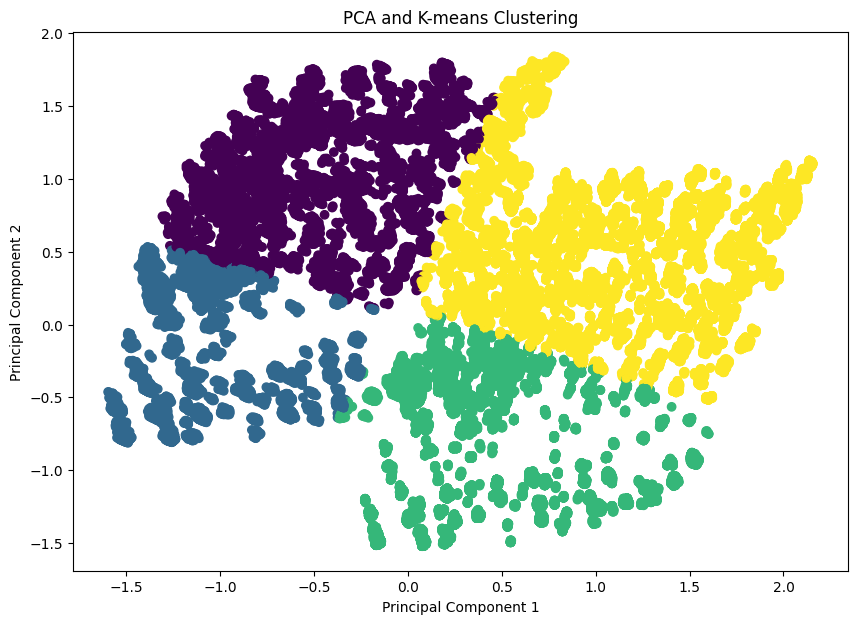

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X_Train_scaled is already defined and scaled

# Initialize PCA with the number of components you want
pca = PCA(n_components=2)

# Fit and transform the scaled training data
X_Train_pca = pca.fit_transform(X_Train_scaled)

# Convert the PCA result to a DataFrame
X_Train_pca_df = pd.DataFrame(X_Train_pca, columns=['PC1', 'PC2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_Train_pca_df)

# Add the cluster labels to the DataFrame
X_Train_pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_Train_pca_df['PC1'], X_Train_pca_df['PC2'], c=X_Train_pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.show()

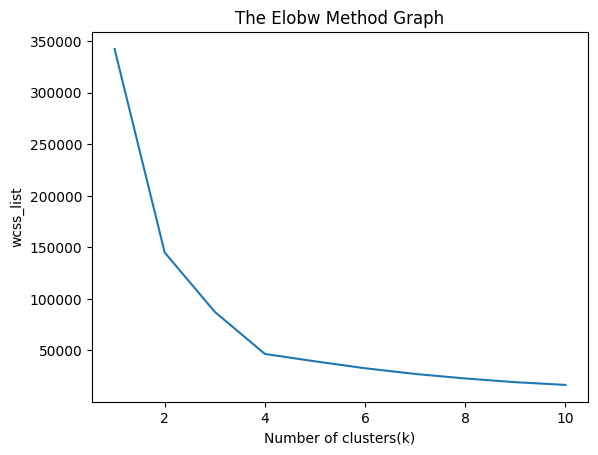

In [64]:
from sklearn.cluster import KMeans  
 
wcss_list= []  #Initializing the list for the values of WCSS  
 
#Using for loop for iterations from 1 to 10.  
 
for i in range(1, 11):  
 
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
 
    kmeans.fit(X_Train_pca_df)  
 
    wcss_list.append(kmeans.inertia_)  
 
plt.plot(range(1, 11), wcss_list)  
 
plt.title('The Elobw Method Graph')  
 
plt.xlabel('Number of clusters(k)')  
 
plt.ylabel('wcss_list')  
 
plt.show()

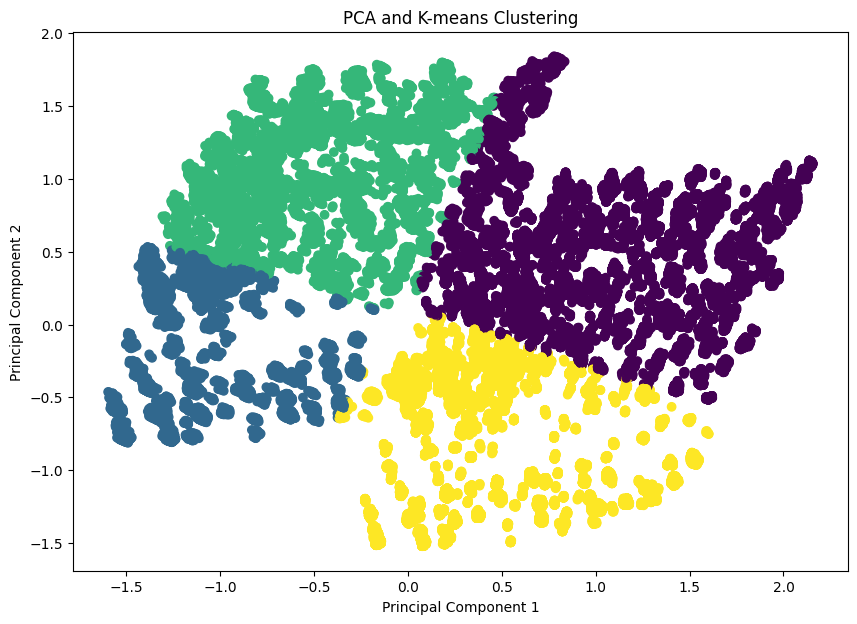

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming X_Train_scaled is already defined and scaled

# Initialize PCA with the number of components you want
pca = PCA(n_components=2)

# Fit and transform the scaled training data
X_Train_pca = pca.fit_transform(X_Train_scaled)

# Convert the PCA result to a DataFrame
X_Train_pca_df = pd.DataFrame(X_Train_pca, columns=['PC1', 'PC2'])

# Perform K-means clustering
kmeans = KMeans(n_clusters=4)  # Adjust the number of clusters as needed
kmeans.fit(X_Train_pca_df)

# Add the cluster labels to the DataFrame
X_Train_pca_df['Cluster'] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_Train_pca_df['PC1'], X_Train_pca_df['PC2'], c=X_Train_pca_df['Cluster'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering')
plt.show()

In [66]:
combined_df = pd.concat([df, X_Train_pca_df], axis=1)

In [67]:
combined_df.head()

CUSTOMER_ID     SEX  AGE   OCCUPATION  \
0  PNC8037640c-94ea-4339-9665-ae95266fb  FEMALE   49  Undisclosed   
1  PNCa191f74d-5afb-48f6-86eb-8b192cc6f  FEMALE   30  Undisclosed   
2  PNC4dcce459-619d-4bc1-b4f9-3f33c4b20    MALE   20  Undisclosed   
3  PNC17e507c0-0854-4785-8aa0-d77e1be74  FEMALE   25  Undisclosed   
4  PNCbc85f095-e62d-4b8f-9a57-22ea37cc2    MALE   61  Undisclosed   

  EDUCATION_LEVEL REGISTRATION_DATE      HOBBIES  PURCHASES  ONEOFF_PURCHASES  \
0     Undisclosed        2000-05-12  Undisclosed    101.124               0.0   
1     Undisclosed        2006-05-12  Undisclosed     98.739               0.0   
2     Undisclosed        2021-04-12  Undisclosed     98.739               0.0   
3     Undisclosed        2022-06-12  Undisclosed    102.078               0.0   
4     Undisclosed        2007-08-12  Undisclosed      0.000               0.0   

   INSTALLMENTS_PURCHASES  ... BANK_ACCOUNT_TYPE      BALANCE  \
0                 103.986  ...           Savings    42.332275   
1                 103.032  ...           Savings    38.446704   
2                  89.676  ...           Savings    37.219682   
3                  88.722  ...           Savings    42.945786   
4                   0.000  ...            Credit  3202.467416   

  BALANCE_FREQUENCY  CREDIT_LIMIT  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0         Very high        1050.0      0.000000                    0.00   
1         Very high        1090.0      0.000000                    0.00   
2              High         910.0      0.000000                    0.00   
3              High         940.0      0.000000                    0.00   
4         Very high        7000.0   6442.945483                    0.25   

   CASH_ADVANCE_TRX       PC1       PC2 Cluster  
0               0.0  0.006169 -1.328073       3  
1               0.0  0.006629 -1.327486       3  
2               0.0 -0.161009 -1.485584       3  
3               0.0 -0.160213 -1.473635       3  
4               4.0  1.512030 -0.892617       3  

[5 rows x 32 columns]

In [68]:
combined_df['Cluster'].value_counts()

Cluster
3    36240
0    32049
1    30589
2    24004
Name: count, dtype: int64

In [69]:
pip install snowflake-connector-python

You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [70]:
import pandas as pd
import snowflake.connector
from snowflake.connector.pandas_tools import write_pandas

In [71]:
combined_df['Cluster'].value_counts()


Cluster
3    36240
0    32049
1    30589
2    24004
Name: count, dtype: int64

In [72]:
combined_df['ClusterID'] = combined_df['Cluster']
 
di = {0: "CLUSTER_0", 1: "CLUSTER_1",2: "CLUSTER_2", 3: "CLUSTER_3"}
combined_df.replace({"ClusterID": di})

CUSTOMER_ID     SEX  AGE         OCCUPATION  \
0       PNC8037640c-94ea-4339-9665-ae95266fb  FEMALE   49        Undisclosed   
1       PNCa191f74d-5afb-48f6-86eb-8b192cc6f  FEMALE   30        Undisclosed   
2       PNC4dcce459-619d-4bc1-b4f9-3f33c4b20    MALE   20        Undisclosed   
3       PNC17e507c0-0854-4785-8aa0-d77e1be74  FEMALE   25        Undisclosed   
4       PNCbc85f095-e62d-4b8f-9a57-22ea37cc2    MALE   61        Undisclosed   
...                                      ...     ...  ...                ...   
122877  918139c9-f707-4a56-90b3-1ae3a2085b64    MALE   60  handlers-cleaners   
122878  72cc7528-8ae0-4c1b-9155-b070b0b16a78    MALE   25     prof-specialty   
122879  8eff19f8-9db4-409a-aa92-4a3ec1cbaee9  FEMALE   19       armed-forces   
122880  8127a4bb-5bce-41d6-be11-655ad9ea31fe    MALE   42    protective-serv   
122881  a5062f35-0ef7-4139-90c4-30a8dd605bf1    MALE   67     prof-specialty   

       EDUCATION_LEVEL REGISTRATION_DATE       HOBBIES  PURCHASES  \
0          Undisclosed        2000-05-12   Undisclosed    101.124   
1          Undisclosed        2006-05-12   Undisclosed     98.739   
2          Undisclosed        2021-04-12   Undisclosed     98.739   
3          Undisclosed        2022-06-12   Undisclosed    102.078   
4          Undisclosed        2007-08-12   Undisclosed      0.000   
...                ...               ...           ...        ...   
122877       Associate        2004-08-12        movies      0.000   
122878             PhD        2021-11-12  base-jumping      0.000   
122879       Associate        2022-10-12      sleeping      0.000   
122880              JD        2001-12-12       reading      0.000   
122881              MD        2021-04-12       reading      0.000   

        ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  ...      BALANCE  \
0                    0.0                 103.986  ...    42.332275   
1                    0.0                 103.032  ...    38.446704   
2                    0.0                  89.676  ...    37.219682   
3                    0.0                  88.722  ...    42.945786   
4                    0.0                   0.000  ...  3202.467416   
...                  ...                     ...  ...          ...   
122877               0.0                   0.000  ...  1559.398672   
122878               0.0                   0.000  ...  1326.217562   
122879               0.0                   0.000  ...  1384.512839   
122880               0.0                   0.000  ...  1384.512839   
122881               0.0                   0.000  ...  1048.703021   

       BALANCE_FREQUENCY CREDIT_LIMIT  CASH_ADVANCE  CASH_ADVANCE_FREQUENCY  \
0              Very high       1050.0      0.000000                0.000000   
1              Very high       1090.0      0.000000                0.000000   
2                   High        910.0      0.000000                0.000000   
3                   High        940.0      0.000000                0.000000   
4              Very high       7000.0   6442.945483                0.250000   
...                  ...          ...           ...                     ...   
122877         Very high       1365.0    248.561265                0.437500   
122878         Very high       1447.5    228.439639                0.383334   
122879         Very high       1425.0    255.663015                0.383334   
122880         Very high       1395.0    258.030265                0.387500   
122881         Very high       1158.0    978.683360                0.090000   

        CASH_ADVANCE_TRX       PC1       PC2 Cluster  ClusterID  
0                  0.000  0.006169 -1.328073       3  CLUSTER_3  
1                  0.000  0.006629 -1.327486       3  CLUSTER_3  
2                  0.000 -0.161009 -1.485584       3  CLUSTER_3  
3                  0.000 -0.160213 -1.473635       3  CLUSTER_3  
4                  4.000  1.512030 -0.892617       3  CLUSTER_3  
...                  ...       ...       ...     ...     

In [73]:
#Code to write back dataframe to Snowflake
 
ins_train_sf=my_session.createDataFrame(
        combined_df.values.tolist(),
        schema=combined_df.columns.tolist())
ins_train_sf.write.mode("overwrite").save_as_table("USECASE_DB_BFSI.BRONZE.BFSI_FINAL")

SnowparkSQLException: (1304): 090073 (22000): Warehouse 'FDC_WAREHOUSE' cannot be resumed because resource monitor 'FDC_WAREHOUSE_RM' has exceeded its quota.